In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('../input/titanic/train.csv')
test_df = pd.read_csv('../input/titanic/test.csv')

In [3]:
train_df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [4]:
test_df['Parch'].value_counts()

0    324
1     52
2     33
3      3
9      2
4      2
6      1
5      1
Name: Parch, dtype: int64

In [5]:
train_data = pd.read_csv('../input/titanic/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
len(train_data)

891

In [7]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
train_data['Survived'].value_counts() #label encode

0    549
1    342
Name: Survived, dtype: int64

In [9]:
train_data['Pclass'].value_counts() #categorize

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
train_data['Sex'].value_counts() #label encode

male      577
female    314
Name: Sex, dtype: int64

In [11]:
train_data['Age'].value_counts() #not categorize but only normalize

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [12]:
train_data['SibSp'].value_counts() #categorize

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [13]:
train_data['Parch'].value_counts() #categorize

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [14]:
train_data['Ticket'].value_counts() #categorize

347082      7
CA. 2343    7
1601        7
CA 2144     6
3101295     6
           ..
2649        1
11771       1
PC 17600    1
17464       1
343120      1
Name: Ticket, Length: 681, dtype: int64

In [15]:
train_data['Fare'].value_counts() #normalize

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [16]:
train_data['Cabin'].value_counts() #categorize

B96 B98        4
C23 C25 C27    4
G6             4
F33            3
C22 C26        3
              ..
A32            1
B82 B84        1
T              1
C86            1
C30            1
Name: Cabin, Length: 147, dtype: int64

In [17]:
train_data['Embarked'].value_counts() #categorize

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
add_dict = {'PassengerId':893, 'Survived':0, 'Pclass':3, 'Name':'mrwobbkle',
            'Sex':'male', 'Age':24, 'SibSp':0, 'Parch':9, 'Ticket':'bumbay',
            'Fare':8, 'Cabin':'doesntmatter', 'Embarked':'S'}

In [19]:
train_data = train_data.append(add_dict, ignore_index = True) 

In [20]:
len(train_data)

892

## Fill missing data

In [21]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)

In [23]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
train_data['Embarked'].value_counts()

S    645
C    168
Q     77
Name: Embarked, dtype: int64

In [25]:
# Filling with most dominanat
train_data['Embarked'].fillna('S', inplace=True)

In [26]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [27]:
cabin_df = train_data['Cabin']
type(cabin_df)

pandas.core.series.Series

In [28]:
cabin_df

0               NaN
1               C85
2               NaN
3              C123
4               NaN
           ...     
887             B42
888             NaN
889            C148
890             NaN
891    doesntmatter
Name: Cabin, Length: 892, dtype: object

<BarContainer object of 148 artists>

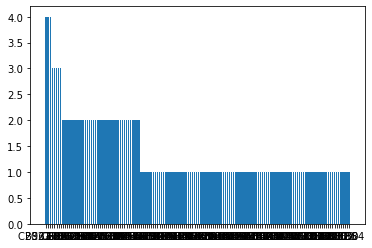

In [29]:
plt.bar(cabin_df.value_counts().index, cabin_df.value_counts())

## Preprocessing the data

1. Label encode for sex (and survival in label_data)
2. One hot encode for pclass, sibsp, parch, ticket, cabin, embarked
3. Normalise for age, fare

### There is a lot of missing cabins. So for the 1st model, ill just remove that column

And we also dont need any names or passenger id

In [30]:
X = train_data.drop(columns=['PassengerId', 'Name', 'Survived', 'Cabin', 'Ticket']) #features
y = train_data['Survived'] #labels 

In [31]:
import tensorflow as tf
from keras.utils import to_categorical

In [32]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [34]:
X = np.array(X)
y = np.array(y)

In [35]:
def preprocess_data(X):
    
    X[:, 1] = LabelEncoder().fit_transform(X[:, 1])
    print (X.shape)
    X = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], 
                          remainder='passthrough').fit_transform(X)
    print (X.shape)
    X = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [5])], 
                          remainder='passthrough').fit_transform(X)
    print (X.shape)
    X = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [12])], 
                          remainder='passthrough').fit_transform(X)
    print (X.shape)
    X = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [21])], 
                          remainder='passthrough').fit_transform(X)
    print (X.shape)
    
    return X

In [36]:
X = preprocess_data(X)

(892, 7)
(892, 9)
(892, 15)
(892, 22)
(892, 24)


In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [39]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) # not fitting to avoid information overlook/leakage of the test data

In [40]:
def ANN():
    ann = tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(units=1024, activation='relu'))
    ann.add(tf.keras.layers.Dense(units=512, activation='relu'))
    ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    
    ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return ann

In [41]:
model = ANN()
model.fit(x=X_train, y=y_train, batch_size=32, epochs=100)

Epoch 1/100
23/23 [==============================] - 0s 5ms/step - loss: 0.5235 - accuracy: 0.7433
Epoch 2/100
23/23 [==============================] - 0s 6ms/step - loss: 0.4192 - accuracy: 0.8205
Epoch 3/100
23/23 [==============================] - 0s 6ms/step - loss: 0.4019 - accuracy: 0.8331
Epoch 4/100
23/23 [==============================] - 0s 6ms/step - loss: 0.3891 - accuracy: 0.8457
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 0.3872 - accuracy: 0.8345
Epoch 6/100
23/23 [==============================] - 0s 6ms/step - loss: 0.3721 - accuracy: 0.8457
Epoch 7/100
23/23 [==============================] - 0s 5ms/step - loss: 0.3703 - accuracy: 0.8457
Epoch 8/100
23/23 [==============================] - 0s 6ms/step - loss: 0.3718 - accuracy: 0.8401
Epoch 9/100
23/23 [==============================] - 0s 6ms/step - loss: 0.3637 - accuracy: 0.8485
Epoch 10/100
23/23 [==============================] - 0s 5ms/step - loss: 0.3769 - accuracy: 0.8415
Epoch 11/

In [42]:
test_df = pd.read_csv('../input/titanic/test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [43]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [44]:
test_df = test_df.drop(columns=['PassengerId', 'Name', 'Cabin', 'Ticket']) #features

In [45]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [46]:
test_df.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [47]:
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)

In [48]:
test_df.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         0
Embarked     0
dtype: int64

In [49]:
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)

In [50]:
test_df.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [51]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [52]:
test_data = np.array(test_df)
print (test_data.shape)

(418, 7)


In [53]:
data_to_pred = preprocess_data(test_data)

(418, 7)
(418, 9)
(418, 15)
(418, 22)
(418, 24)


In [54]:
data_to_pred.shape

(418, 24)

In [55]:
data_to_pred

array([[0.0, 1.0, 0.0, ..., 1, 34.5, 7.8292],
       [0.0, 0.0, 1.0, ..., 0, 47.0, 7.0],
       [0.0, 1.0, 0.0, ..., 1, 62.0, 9.6875],
       ...,
       [0.0, 0.0, 1.0, ..., 1, 38.5, 7.25],
       [0.0, 0.0, 1.0, ..., 1, 30.272590361445783, 8.05],
       [1.0, 0.0, 0.0, ..., 1, 30.272590361445783, 22.3583]], dtype=object)

In [56]:
scaled_test_data = sc.transform(data_to_pred)

In [57]:
preds = model.predict(x=scaled_test_data)
print (preds)

[[2.74489224e-02]
 [1.51277184e-02]
 [6.85181822e-09]
 [1.35722846e-01]
 [1.38551652e-01]
 [9.38595533e-02]
 [8.60245347e-01]
 [1.84208155e-03]
 [5.74289918e-01]
 [2.56210566e-04]
 [1.44937962e-01]
 [4.79303449e-01]
 [9.99628663e-01]
 [5.70902421e-06]
 [9.99971449e-01]
 [9.98966217e-01]
 [2.02836394e-02]
 [5.07085383e-01]
 [4.63215888e-01]
 [2.01889873e-03]
 [9.91013110e-01]
 [1.83706105e-01]
 [9.99896169e-01]
 [5.83440065e-04]
 [9.95187521e-01]
 [3.86143847e-06]
 [9.99252558e-01]
 [5.30703902e-01]
 [6.20563030e-01]
 [8.35285027e-05]
 [9.08150614e-05]
 [2.46495008e-04]
 [6.95622563e-02]
 [2.07673341e-01]
 [9.96578634e-01]
 [4.10896271e-01]
 [2.50623286e-01]
 [6.41752422e-01]
 [1.11791849e-01]
 [5.53604960e-01]
 [1.69376135e-02]
 [4.48150188e-01]
 [1.22699589e-01]
 [9.26231205e-01]
 [9.99940991e-01]
 [1.08275443e-01]
 [7.89846539e-01]
 [7.66399205e-02]
 [9.82276320e-01]
 [4.54162061e-02]
 [2.36992091e-01]
 [4.76237118e-01]
 [9.99984860e-01]
 [9.99996722e-01]
 [7.46239066e-01]
 [2.886557

In [58]:
pred_list = []

for pred in preds:
    if pred > 0.5:
        y_pred = 1
    else:
        y_pred = 0
        
    pred_list.append(y_pred)

In [59]:
pred_list

[0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,


In [60]:
len(pred_list)

418

In [61]:
sample_sub = pd.read_csv('../input/titanic/gender_submission.csv')
sample_sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [62]:
sample_sub['Survived'] = pred_list

In [63]:
sample_sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [64]:
sample_sub.to_csv('submission.csv', index=False) #Dataframe to csv